# Logistic回归

Logistic回归是众多分类算法中的一员。通常，Logistic回归用于二分类问题，例如预测明天是否会下雨。当然它也可以用于多分类问题，本文暂先讨论二分类问题。

首先，让我们来了解一下，什么是Logistic回归。

假设现在有一些数据点，我们利用一条直线对这些点进行拟合(该线称为最佳拟合直线)，这个拟合过程就称作为**回归**，如下图所示：![jupyter](./img/Logistic-1.png)
利用Logistic回归进行分类的**主要思想是**：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归”一词源于最佳拟合，表示要找出最佳拟合参数集，后面部分将介绍用到的基础，训练分类器时就是要找出最佳拟合参数。其实，Logistic本质上是一个基于条件概率的判别模型(Discriminative Model)。

# Sigmoid函数
要想了解Logistic回归，我们必须先看一看Sigmoid函数 ，也可以称它为Logistic函数。

在线性回归中，根据模型可以得到任意样本$x$的预测值。如果要根据线性回归进行分类，则需要找一个**单调可微函数**将分类的真实标记和线性回归的预测值联系起来。

考虑二分类问题，可是使用**单位阶跃函数**。如下为一种单位阶跃函数的代码和图形。

<Figure size 288x216 with 0 Axes>

(-0.1, 1.1)

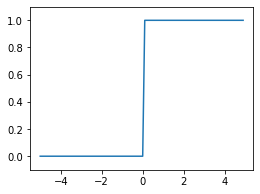

In [7]:
import numpy as np
import matplotlib.pylab as plt
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

def step_function(x):
    y = x > 0  # numpy数组中的每个元素都与0比较大小，得到一个布尔型numpy数组
    return y.astype(np.int)   #　astype()方法将numpy数组的布尔型转换为int型

x = np.arange(-5.0,5.0,0.1)  # 生成一个numpy数组，范围是(-5.0,5.0),步长为0.1
y = step_function(x)
plt.figure(figsize=(4,3))#设置尺寸
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

该函数在跳跃点瞬间从0变为1，这个瞬间过程有时很难处理。

Sigmoid函数有类似的分类性质，在数学上也更易处理，其公式为：$$\sigma(z)=\frac{1}{1+e^{-z}}$$代码和绘图如下：

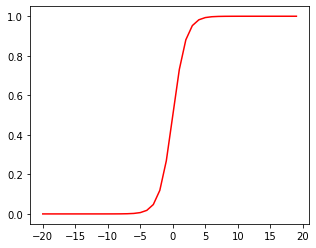

In [8]:
#绘制sigmoid函数图形
##sigmoid函数为1/(1+exp(x))
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):#定义sigmoid函数
    return 1/(1+np.exp(-z))

nums=np.arange(-20,20,step=1)
fig,ax=plt.subplots(figsize=(5,4))
ax.plot(nums,sigmoid(nums),"r")

Sigmoid函数很像"S"曲线，不同坐标尺度下，陡峭成都不一样。函数随$x$减小趋向于0，随$x$增大趋向于1。在$x=0$处，Sigmoid函数值为0.5。从图形上看，很像一个阶跃函数。

为了实现Logistic回归，可以将模型的预测值作为$z$代入Sigmoid函数，得到一个0~1之间的值。Sigmoid函数值大于0.5，就归为1类（或者正类），小于0.5就归于0类（或者负类）。这样就实现二分类。Sigmoid函数值可以看成是属于类别的概率，所以，Logistic回归看成是一种**概率估计**。

确定了分类器的函数形式之后，就要确定最佳回归系数是多少，如何确定其大小，后面的内容将进行解答。

# 线性模型
## 线性回归模型
设输入空间$X \subseteq R^d$为d维向量的集合，设$x=(x_1;x_2;\cdots;x_d)$是一个样本，其中$x_i$是$x$在第i个属性上的取值，**线性模型**试图学习如下的一个线性组合的预测函数来对任意输入$x$进行预测$$y=f(x)=\sum_{i=1}^dw_ix_i+b  \tag 1$$

一般可以写成向量的形式：$$f(x)=w^Tx+b$$其中$w=(w_1;w_2;\cdots;w_d)^T$，b是标量。有时候**称w为权重，称b为偏差**。w和b都是模型要学习的参数，参数确定后，模型就确定了。

有时候，向量形式还可以换一种方式表达：$$f(x)=w^Tx\tag 2$$此时$w=(b;w_1,w_2;\cdots;w_d)^T$，输入$x=(1;x_1;x_2;\cdots;x_d)$。如前所述，向量都是列向量，$T$操作表示转置。后面的案例就采用了这种形式。

线性模型易于建模，形式简单，但是在机器学习中蕴含着非常重要的思想。许多强大的非线性模型可以在线性模型的基础上通过引入层级结构或高维映射得到。此外，w表达了各属性在预测中的重要程度，即权重，具有很好的可解释性。

## 线性回归求解

先考虑一种简单情形，假设数据集的输入$x_i$只有一维。给定数据集$D=\lbrace(x_1,y_1),(x_2,y_2),\cdots,(x_m,y_m)\rbrace$,其中，m为样本数量，$x_i$是第i个样本的输入，$y_i\in R$是第i个样本的实值输出。则线性回归模型试图学得$$f(x_i)=wx_i+b，使得f(x_i)\approx y_i$$

样本数据集是给定的，模型学习就是要确定w和b两个值。显然，求解的关键是如何衡量$f(x)$和$y$之间的**差别**。

为求解w和b，常使用**均方误差**，使得模型值与实际值之间的误差最小化。即
$$\begin{eqnarray*}
(w^*,b^*)&=&\underset{<w,b>}{\operatorname{argmin}}E_{(w,b)}\\
&=&\underset{<w,b>}{\operatorname{argmin}}\sum_{i=1}^{m}(y_i-f(x_i))^2\\
&=&\underset{<w,b>}{\operatorname{argmin}}\sum_{i=1}^{m}(y_i-wx_i-b)^2
\end{eqnarray*}$$
均方误差对应了**欧式距离**。基于均方误差最小化求模型参数的方法称为**“最小二乘法”**。在线性回归中，最小二乘法就是找到一条直线，使所有样本到直线上的欧氏距离之和最小。

求解w和b使得$E_{(w,b)}$(**损失函数**)最小化的过程称为线性回归模型的最小二乘参数估计。分别将$E_{(w,b)}$对w和b求导，并使得求导为零，可得到w和b最优解的闭式解：$$w=\cfrac{\sum_{i=1}^my_i(x_i-\bar x)}{\sum_{i=1}^mx_i^2-\frac{1}{m}(\sum_{i=1}^mx_i)^2}$$$$b=\frac{1}{m}\sum_{i=1}^m(y_i-wx_i)$$

上述输入$x$是一维的，更一般的情况是$x$是$d$维的。此时，模型试图学得$$f(x_i)=w^Tx_i+b，使得f(x_i)\approx y_i$$这就是**“多元线性回归”**。

为求解w和b，将b视为$w_{d+1}$,$x$对应的输入为1，模型转化为$f(x)=w^Tx$，w和x都是一个$d+1$维的列向量（参考公式2）。如下：

$$X=\left\lgroup \matrix{
x_{11}& x_{12} & \dots & x_{1d} & 1 \cr 
x_{21} & x_{22} & \dots & x_{2d} & 1 \cr 
\dots \dots \cr 
x_{m1}&x_{m2}&\dots & x_{md} & 1 
}\right\rgroup$$

$$w=\left\lgroup \matrix{
w_1 \cr 
w_2\cr 
\dots \cr 
w_d \cr
b
}\right\rgroup$$

类似于一维输入的情况，有$$\hat {w}^*=\underset{<\hat w>}{\operatorname{argmin}}{E_{\hat w}}=\underset{<\hat w>}{\operatorname{argmin}}(y-X\hat w)^T(y-X\hat w)$$

 求${E_\hat w}$对$\hat w$的导数，得 $$\frac{\partial {E_{\hat w}}}{\partial \hat w}=2X^T(X\hat w-y)$$

令上式为零，当$X^TX$维满秩矩阵或者正定矩阵，可得$$\hat {w}^*=(X^TX)^{-1}X^Ty$$

令$\hat x_i=(x_i,1)$，**最终学得的多元回归模型**为$$f(\hat x_i)=\hat x_i^T(X^TX)^{-1}X^Ty$$然而，现实任务中， $X^TX$往往并不是满秩矩阵，X的列数多于行数。此时可以求出多个$\hat w$,选择一个作为输出。

在线性回归这个简单例⼦⾥，令损失函数对模型参数求导后的结果为零可以解出最小化损失函数的模型参数。这类解叫做**解析解**（analytical solution）。然而，⼤多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫做**数值解**（numerical solution）。

## 梯度上升法优化参数

线性回归中我们求得了最优化的闭式解。这小节介绍的方法是梯度上升法。**梯度上升法的基本思想是**：要找到某函数$f(x,y)$的最大值，最好的方法是沿着该函数的梯度方向探寻。如果梯度(算子)记为$\nabla$，则函数$f(x,y)$的梯度表示为：$$\nabla f(x,y)=\left[\frac{\partial f(x,y)}{\partial x},\frac{\partial f(x,y)}{\partial y}\right]^T$$

梯度算子确定了探寻的**方向**，而未提到移动量的大小，这个移动量被称为**步长**$\alpha$。用向量来表示的话，**梯度算法的迭代公式**就是$$w:=w+\alpha \nabla_wf(w)$$该公式将一直迭代执行，直到满足终止条件，如到达**指定的迭代次数，或者误差到达可以允许的范围**。

常用的术语是**梯度下降法**，只是迭代算法中的加号变成了减号。梯度上升法用来求函数的最大值，而**梯度下降法用来求最小值**。

## 二分类代码实现

### 代码实现
基于上面的内容，现在来看一个使用梯度上升法寻找Logistic回归模型的最佳参数的例子。先定义**读取数据集**的函数：

In [9]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('./DataSet/Logistic-testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
        #dataMat.append([float(lineArr[0]), float(lineArr[1])])
        #labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [10]:
dataMat,labelMat=loadDataSet()
dataMatrix = mat(dataMat)             #convert to NumPy matrix
labelMat = mat(labelMat).transpose() #convert to NumPy matrix
print(dataMatrix[0:5,:],labelMat[0:5,:])
#print(dataMat[0],labelMat[0:5])

[[ 1.       -0.017612 14.053064]
 [ 1.       -1.395634  4.662541]
 [ 1.       -0.752157  6.53862 ]
 [ 1.       -1.322371  7.152853]
 [ 1.        0.423363 11.054677]] [[0]
 [1]
 [0]
 [0]
 [0]]


结果显示了数据集中的前5个样本点和5个标签，数据矩阵第一列为1，可以理解为公式f-2做的简单变换（将b视为w向量中的一个参数，这样样本点中的数据由两列变为三列）。

下面其它函数：

In [11]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        #下面2行，计算误差，按照差值方向调整回归系数。未推导。
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

gradAscent函数接收数据集和标签，每个回归系数初始化为1，然后重复K次：计算整个数据集的梯度，更新回归系数的向量，返回回归系数。

plotBestFit函数画出分析数据后的决策边界。结果显示了一组回归系数（3个值，即$w_1,w_2,w_3<即b>$），并画出图来分析数据，浅蓝色直线是依据参数画出的类别分界线。图中看到，有几组数据分类错误。

一组回归系数 [[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


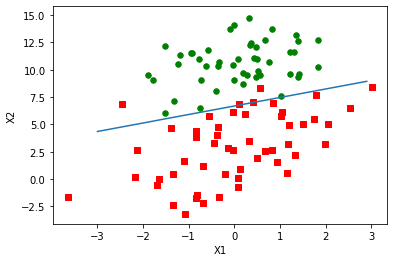

In [12]:
from numpy import *
#reload(logRegres)
dataMatIn,classLabels=loadDataSet()
weights=gradAscent(dataMatIn, classLabels)
print("一组回归系数",weights)
plotBestFit(weights.getA())


尽管本数据集比较小，但是却需要大量的计算。梯度上升算法在每次更新回归系数(最优参数)时，都需要遍历整个数据集。可以看一下我们之前写的梯度上升算法gradAscent函数：

假设，我们使用的数据集一共有100个样本。那么，dataMatrix就是一个100行3列的矩阵。每次计算h的时候，都要计算$dataMatrix*weights$这个矩阵乘法运算，要进行$100*3$次乘法运算和$100*2$次加法运算。同理，更新回归系数(最优参数)weights时，也需要用到整个数据集，要进行矩阵乘法运算。总而言之，该方法处理100个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。因此，需要对算法进行**改进**，我们每次更新回归系数(最优参数)的时候，能不能不用所有样本呢？一次只用一个样本点去更新回归系数(最优参数)？这样就可以有效减少计算量了，这种方法就叫做**随机梯度上升算法**。由于在新样本到来时对分类器进行增量更新，因此随机梯度学习算法是一个在线算法。

### 随机梯度上升算法
设计函数如下：

In [13]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

测试代码如下：

一组回归系数 [ 1.01702007  0.85914348 -0.36579921]


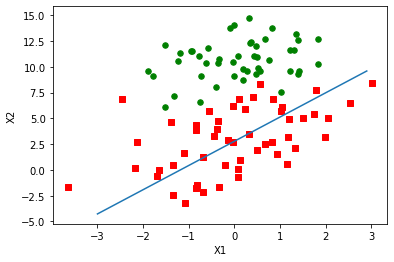

In [14]:
dataMatIn,classLabels=loadDataSet()
weights=stocGradAscent0(array(dataMatIn), classLabels)
print("一组回归系数",weights)
plotBestFit(weights)

运行结果表明，分界直线还不错，但是错误分类的样本更多。但是要看到，改进算法只运行了500次，所以现在比较算法好坏是不公平的。我还需要进一步修改迭代条件，使其在整个数据集上运行200次，或者参数趋于稳定。

### 回归系数与迭代次数的关系
可以看到分类效果也是不错的。不过，从这个分类结果中，我们不好看出迭代次数和回归系数的关系，也就不能直观的看到每个回归方法的收敛情况。因此，我们编写程序，绘制出回归系数和迭代次数的关系曲线：

'\nParameters:\n    dataMatIn - 数据集\n    classLabels - 数据标签\nReturns:\n    weights.getA() - 求得的权重数组(最优参数)\n    weights_array - 每次更新的回归系数\n'

'\n函数说明:改进的随机梯度上升算法\n \nParameters:\n    dataMatrix - 数据数组\n    classLabels - 数据标签\n    numIter - 迭代次数\nReturns:\n    weights - 求得的回归系数数组(最优参数)\n    weights_array - 每次更新的回归系数\n'

'\n函数说明:绘制回归系数与迭代次数的关系\n \nParameters:\n    weights_array1 - 回归系数数组1\n    weights_array2 - 回归系数数组2\nReturns:\n    无\n\n'

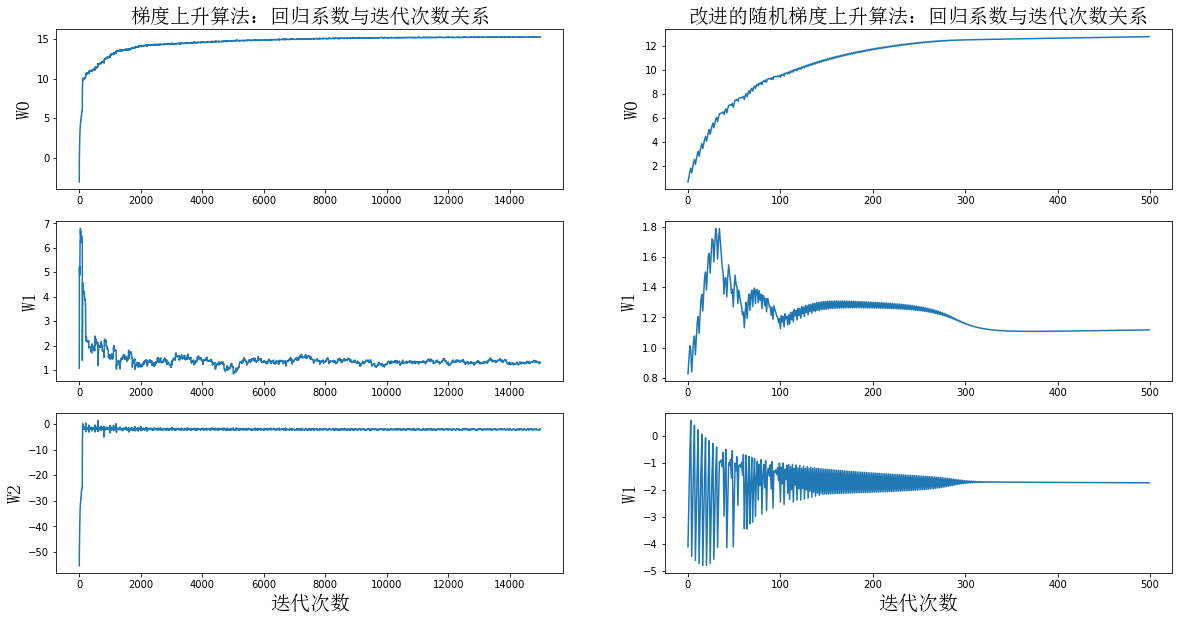

In [15]:
# -*- coding:UTF-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
import random
 
#函数说明:加载数据
 
def loadDataSet():
    dataMat = []                                                        #创建数据列表
    labelMat = []                                                        #创建标签列表
    fr = open('./DataSet/Logistic-testSet.txt')                                            #打开文件   
    for line in fr.readlines():                                            #逐行读取
        lineArr = line.strip().split()                                    #去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])        #添加数据
        labelMat.append(int(lineArr[2]))                                #添加标签
    fr.close()                                                            #关闭文件
    return dataMat, labelMat                                            #返回
 
#函数说明:sigmoid函数
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))
 
#函数说明:梯度上升算法
'''
Parameters:
    dataMatIn - 数据集
    classLabels - 数据标签
Returns:
    weights.getA() - 求得的权重数组(最优参数)
    weights_array - 每次更新的回归系数
'''
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                        #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                            #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                            #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.01                                                        #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                        #最大迭代次数
    weights = np.ones((n,1))
    weights_array = np.array([])
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
        weights_array = np.append(weights_array,weights)
    weights_array = weights_array.reshape(maxCycles,n)
    return weights.getA(),weights_array                                    #将矩阵转换为数组，并返回
 
"""
函数说明:改进的随机梯度上升算法
 
Parameters:
    dataMatrix - 数据数组
    classLabels - 数据标签
    numIter - 迭代次数
Returns:
    weights - 求得的回归系数数组(最优参数)
    weights_array - 每次更新的回归系数
"""
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)                                                #返回dataMatrix的大小。m为行数,n为列数。
    weights = np.ones(n)                                                       #参数初始化
    weights_array = np.array([])                                            #存储每次更新的回归系数
    for j in range(numIter):                                           
        dataIndex = list(range(m))
        for i in range(m):           
            alpha = 4/(1.0+j+i)+0.01                                            #降低alpha的大小，每次减小1/(j+i)。
            randIndex = int(random.uniform(0,len(dataIndex)))                #随机选取样本
            h = sigmoid(sum(dataMatrix[dataIndex[randIndex]]*weights))          #选择随机选取的一个样本，计算h
            error = classLabels[dataIndex[randIndex]] - h                           #计算误差
            weights = weights + alpha * error * dataMatrix[dataIndex[randIndex]]   #更新回归系数
            weights_array = np.append(weights_array,weights,axis=0)         #添加回归系数到数组中
            del(dataIndex[randIndex])                                         #删除已经使用的样本
    weights_array = weights_array.reshape(numIter*m,n)                         #改变维度
    return weights,weights_array                                             #返回
 
"""
函数说明:绘制回归系数与迭代次数的关系
 
Parameters:
    weights_array1 - 回归系数数组1
    weights_array2 - 回归系数数组2
Returns:
    无

"""
def plotWeights(weights_array1,weights_array2):
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=3,nclos=2时,代表fig画布被分为六个区域,axs[0][0]表示第一行第一列
    fig, axs = plt.subplots(nrows=3, ncols=2,sharex=False, sharey=False, figsize=(20,10))
    x1 = np.arange(0, len(weights_array1), 1)
    #绘制w0与迭代次数的关系
    axs[0][0].plot(x1,weights_array1[:,0])
    axs0_title_text = axs[0][0].set_title(u'梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][0].plot(x1,weights_array1[:,1])
    axs1_ylabel_text = axs[1][0].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][0].plot(x1,weights_array1[:,2])
    axs2_xlabel_text = axs[2][0].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][0].set_ylabel(u'W2',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')
  
    x2 = np.arange(0, len(weights_array2), 1)
    #绘制w0与迭代次数的关系
    axs[0][1].plot(x2,weights_array2[:,0])
    axs0_title_text = axs[0][1].set_title(u'改进的随机梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][1].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][1].plot(x2,weights_array2[:,1])
    axs1_ylabel_text = axs[1][1].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][1].plot(x2,weights_array2[:,2])
    axs2_xlabel_text = axs[2][1].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][1].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')
 
    plt.show()       
 
if __name__ == '__main__':
    dataMat, labelMat = loadDataSet()           
    weights1,weights_array1 = stocGradAscent1(np.array(dataMat), labelMat)
 
    weights2,weights_array2 = gradAscent(dataMat, labelMat)
    plotWeights(weights_array1, weights_array2)

由于改进的随机梯度上升算法，随机选取样本点，所以每次的运行结果是不同的。但是大体趋势是一样的。我们改进的随机梯度上升算法收敛效果更好。为什么这么说呢？让我们分析一下。我们一共有100个样本点，改进的随机梯度上升算法迭代次数为150。而上图显示15000次迭代次数的原因是，使用一次样本就更新一下回归系数。因此，迭代150次，相当于更新回归系数150*100=15000次。简而言之，迭代150次，更新1.5万次回归参数。从上图左侧的改进随机梯度上升算法回归效果中可以看出，其实在更新2000次回归系数的时候，已经收敛了。相当于遍历整个数据集20次的时候，回归系数已收敛。训练已完成。

再让我们看看上图右侧的梯度上升算法回归效果，梯度上升算法每次更新回归系数都要遍历整个数据集。从图中可以看出，当迭代次数为300多次的时候，回归系数才收敛。凑个整，就当它在遍历整个数据集300次的时候已经收敛好了。

没有对比就没有伤害，改进的随机梯度上升算法，在遍历数据集的第20次开始收敛。而梯度上升算法，在遍历数据集的第300次才开始收敛。想像一下，大量数据的情况下，谁更牛逼？

### 二分类
下面用**Logistic回归进行分类**。由于上面优化算法已经得出优化的回归系数，也即得出了分类模型，**根据分类模型计算预测值**，将预测值带入Sigmoid函数，函数值大于0.5，就归于1类，否则归于0类。增加如下的函数：

In [16]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('./DataSet/horseColicTraining.txt'); 
    frTest = open('./DataSet/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

classifyVector函数计算模型的值，并计算Sigmoid函数的值。colicTest函数用于打开训练集和测试集。stocGradAscent1函数用来计算回归向量，该函数以参数收敛作为终止条件。multiTest函数调用colicTest函数10次并求结果的平均值。

这里要注意，训练数据和测试数据都产生了变化，是**测试马的死亡率的**。

In [17]:
multiTest()

f:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.283582
the error rate of this test is: 0.373134
the error rate of this test is: 0.358209
the error rate of this test is: 0.328358
the error rate of this test is: 0.402985
the error rate of this test is: 0.402985
the error rate of this test is: 0.283582
the error rate of this test is: 0.328358
the error rate of this test is: 0.402985
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.344776


## 总结
Logistic回归的一般过程：

收集数据：采用任意方法收集数据。

准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。

分析数据：采用任意方法对数据进行分析。

训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。

测试算法：一旦训练步骤完成，分类将会很快。

使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数，就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

# 线性判别分析

## 二分类判别

**线性判别分析（LDA）**是一种经典的线性学习方法，在二分类问题上最早由Fisher提出，也称为“Fisher判别分析”。

**LDA的思想**非常朴素：给定训练样本集，设法将样例**投影到一条直线上**，使得同类样例的投影点尽可能接近，异类样例的投影点尽可能远。对新的样例分类时，先将其投影到直线上，再根据投影点的位置确定新样例的类别。下图描述了其思想。![jupyter](./img/Logistic-2.png)

所谓的线性,就是要将数据点投影到直线上（可能是多条直线），直线的函数解析式又称为线性函数。通常直线的表达式为$$y=w^Tx=w_1x_1+w_2x_2$$
这里的x就是样本向量（列向量），如果投影到一条直线上w就是一个**特征向量**（列向量形式）或者多个特征向量构成的矩阵,w就是要求的模型系数。样本x到直线的距离可以用该公式来计算。

给定数据集$D=\lbrace (x_i,y_i) \rbrace_1^m$,$y_i\in \lbrace0,1\rbrace$,令：

$X_i$：第$i\in \lbrace 0,1\rbrace$类示例的**集合**

$\mu_i$：第$i\in \lbrace 0,1\rbrace$类示例的**均值向量**

$\Sigma_i$：第$i\in \lbrace 0,1\rbrace$类示例的**协方差矩阵**

将样本投影到直线w上，则**两类样本**的中心在直线上的投影分别为$w^T\mu_0$、$w^T\mu_1$；若将所有样本点都投影到直线上，则两类样本的协方差分别是$w^T\Sigma_0w$、$w^T\Sigma_1w$。由于直线是实数的一维空间，因此，$w^T\mu_0$、$w^T\mu_1$、$w^T\Sigma_0w$、$w^T\Sigma_1w$都是实数。

投影后同类样本协方差矩阵的求法： $$\sum_{x\in D_i}(w^Tx−w^T\mu_i)^2=\sum_{x\in D_i}(w^T(x−\mu_i))^2=\sum_{x\in D_i}w^T(x−\mu_i)(x-\mu_i)^Tw=w^T\sum_{x\in D_i}[(x−\mu_i)(x-\mu_i)^T]w $$

上式的中间部分$\sum_{x\in D_i}(x−\mu_i)(x-\mu_i)^T$便是同类样本投影前的协方差矩阵。由此可以看出同类样本投影前后协方差矩阵之间的关系。如果投影前的协方差矩阵为$\Sigma$,则投影后的为 $w^T\Sigma w$。

上式的推导需要用到如下公式：$a,b$都是列向量，$(a-b)^2=(a^Tb)^2=(a^Tb)(a^Tb)=(a^Tb)(a^Tb)T=a^Tbb^Ta$

用到的均值、方差、协方差等概念在下面简单解释。
**均值**表示一组数的几种程度$$\bar X=\frac{\sum_{i=1}^nX_i}{n}$$
**方差**与均值正好相反，用来表示一组数的离散程度，也就是一组数中每一个数到均值的距离。由于均值通常是一组数的中心点，为了避免左右两侧的数据由于正负相互抵消无法准确的表示平均距离，要先对距离取平方在进行汇总，汇总的结果就是方差的值。方差开平方就是标准差。$$S^2=var(X)=\frac{\sum_{i=1}^n(X_i-\bar X)^2}{n-1}$$

**协方差**是在方差的基础上扩展得到的，从计算公式中就能看出来。协方差与方差有两个最大的区别，第一个区别是方差是用来描述一组数的而协方差是用来描述两组数的。第二个区别是方差用来描述一组数的离散程度，也就是离均值的距离，而协方差是用来描述两组数直接的联系的。协方差计算公式：$$cov(X,Y)=\frac{\sum_{i=1}^n(X_i-\bar X)(Y_i-\bar Y)}{n-1}$$

协方差是一种用来度量两个随机变量关系的统计量。
当cov(X, Y)>0时，表明 X与Y 正相关；
当cov(X, Y)<0时，表明X与Y负相关；
当cov(X, Y)=0时，表明X与Y不相关。

**协方差矩阵**:协方差只能处理两组数（两维）间的关系，当要计算的数据多于两组（多维）时，就要用到协方差矩阵。协方差矩阵其实是分别计算了不同维度之间的协方差。协方差矩阵是一个对称的矩阵，对角线是各个维度上的方差。

LDA的思想，是**使得同类样例的投影点尽可能接近，异类样例的投影点尽可能远**，也即使得$w^T\Sigma_0w+w^T\Sigma_1w$尽可能小，$\Vert w^T\mu_0-w^T\mu_1 \Vert_2^2$尽可能大。同时考虑二者，就是最大化下列目标：$$J=\frac{\Vert w^T\mu_0-w^T\mu_1\Vert_2^2}{w^T\Sigma_0w+w^T\Sigma_1w}=\frac{w^T(\mu_0-\mu_1)(\mu_0-\mu_1)^Tw}{w^T\Sigma_0w+w^T\Sigma_1w}\tag 3$$

定义**“类内散度矩阵”**(w是within的简写)：$$S_w=\Sigma_ {0}+\Sigma_ {1}=\sum_{x\in X_0}(x-\mu_0)(x-\mu_0)^T+\sum_{x\in X_1}(x-\mu_1)(x-\mu_1)^T$$

定义**“类间散度矩阵”**(b是between的简写)：$$S_b=(\mu_0-\mu_1)(\mu_0-\mu_1)^T$$

则公式3中的目标$J$可以表达为：$$J=\frac{w_TS_bw}{w^TS_ww} \tag 4$$这就是LDA欲最大化的目标，即$S_b$和$S_W$之间的“广义瑞利商”，只需找到使$J$最大的$w$即可。

如何确定w呢？注意到公式4的分子和分母都是关于w的二次项，因此公式4的解于w长度无关，至于其方向有关。不失一般性，令$w^TS_ww=1$（取单位长度，对分母进行归一化），则式4等价于$$\underset{w}{\operatorname{argmin}}-w^TS_bw$$$$s.t.w^TS_ww=1$$

由拉格朗日乘子法，求导$$c(w)=w^TS_bw-\lambda(w^TS_ww-1)\Rightarrow \frac{dc}{dw}=2S_bW-2\lambda S_ww=0\Rightarrow S_bw=\lambda S_ww$$

即目标等价于$$S_bw=\lambda S_ww\tag 5$$其中$\lambda$是拉格朗日乘子。注意$S_b$是类间散度矩阵，是已知的，另外$S_bw$的方向恒为$\mu_0-\mu_1$，不妨令$$S_bw=\lambda(\mu_0-\mu_1)$$带入公式5，即得$$w=S_w^{-1}(\mu_0-\mu_1)$$

至此，只需要计算出训练样本示例的均值和方差，就可以计算出最佳的方向w，这就是Fisher于1936年提出的线性判别分析。

考虑到数字解的稳定性，在实践中通常是对$S_w$进行奇异值分解，即$S_w=U\Sigma V^T$，这里$\Sigma$是一个实对角矩阵，其对角线上的元素是$S_w$的奇异值，然后再有$S_w^{-1}=V\Sigma ^{-1}U^T$得到$S_w^{-1}$。

可以证明，当两类数据先验、满足高斯分布且协方差相等时，LDA可达到最优分类。

## 多分类判别

可将LDA推广到多分类任务中，假定存在N个类别，且第i类示例数为$m_i$。

定义“全局散度矩阵”$$S_t=S_b+S_w=\sum_{i=1}^m(x_i-\mu)(x_i-\mu)^T\tag 7$$其中$\mu$是所有示例的均值向量。将类内散度矩阵$S_w$重新定义为每个类别的散度矩阵之和，即$$S_w=\sum_{i=1}^NS_{w_i}\tag 8$$其中，$$S_{w_i}=\sum_{x\in X_i}(x-\mu_i)(x-\mu_i)^T\tag 9$$由7、8、9可得到$$S_b=S_t-S_w=\sum_{i=1}^Nm_i(\mu_i-\mu)(\mu_i-\mu)^T$$

## 二分类判别例子

初始化数据并绘图。

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

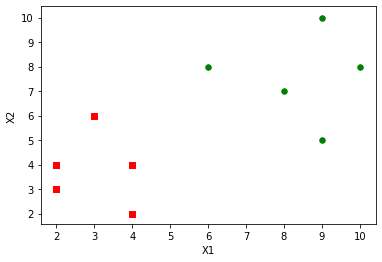

In [18]:
import numpy as np
import matplotlib.pyplot as plt
X1=[[4,2],[2,4],[2,3],[3,6],[4,4]]#第1类样本
X2=[[9,10],[6,8],[9,5],[8,7],[10,8]]#第2类样本
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(X1)[:,0], np.array(X1)[:,1], s=30, c='red', marker='s')
ax.scatter(np.array(X2)[:,0], np.array(X2)[:,1], s=30, c='green')
plt.xlabel('X1'); plt.ylabel('X2');
plt.show()

In [19]:
# 根据公式计算类内离散度矩阵子项si
def compute_Sw(xi):
    n = xi.shape[0]
    ui = mean(xi)
    sw = 0
    for i in range(0, n):
        sw = sw + (xi[i, :] - ui).T * (xi[i, :] - ui)
    return sw

In [20]:
# 根据公式计算类间离散度矩阵Sb
def compute_Sb(x1, x2):
    dataX=np.vstack((x1,x2))#合并样本
    #print ("dataX:", dataX)
    #计算均值
    u1=mean(x1, axis=0)#axis=0表示按照列来求均值，如果输入list,则axis=1
    u2=mean(x2, axis=0)
    u=mean(dataX) #所有样本的均值
    Sb = (u-u1).T * (u-u1) + (u-u2).T * (u-u2)
    return Sb

In [21]:
def LDA(x1, x2):
    # 计算类内离散度矩阵Sw
    s1 = compute_Sw(x1)
    s2 = compute_Sw(x2)
    # Sw=(n1*s1+n2*s2)/(n1+n2)
    Sw = s1 + s2

    # 计算类间离散度矩阵Sb
    Sb = compute_Sb(x1, x2)

    # 求最大特征值对应的特征向量
    eig_value, vec = np.linalg.eig(np.mat(Sw).I * Sb)  # 特征值和特征向量
    index_vec = np.argsort(-eig_value)  # 对eig_value从大到小排序，返回索引
    eig_index = index_vec[:1]  # 取出最大的特征值的索引
    w = vec[:, eig_index]  # 取出最大的特征值对应的特征向量
    return w


In [22]:
import numpy as np
import matplotlib.pyplot as plt
if __name__ == "__main__":
    x1=np.mat([[4,2],[2,4],[2,3],[3,6],[4,4]])#第1类样本
    x2=np.mat([[9,10],[6,8],[9,5],[8,7],[10,8]])#第2类样本
    #print (x1, x2)
    w = LDA(x1, x2)
    print ("\n判别系数w:\n", w)


判别系数w:
 [[0.88837693]
 [0.45911484]]


## 多分类判别例子

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.


Eigenvector 1: 
[[ 0.20874182]
 [ 0.38620369]
 [-0.55401172]
 [-0.7073504 ]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.00653196]
 [-0.58661055]
 [ 0.25256154]
 [-0.76945309]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.60080256]
 [ 0.04955842]
 [ 0.1166181 ]
 [-0.78929111]]
Eigenvalue 3: 6.51e-15

Eigenvector 4: 
[[-0.4314311 ]
 [ 0.43584062]
 [ 0.48618301]
 [-0.62252409]]
Eigenvalue 4: -5.31e-15


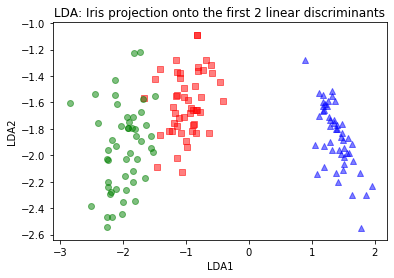

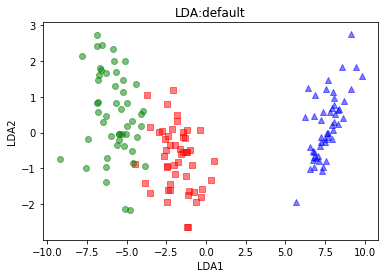

In [23]:
# -*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt

def read_iris():
    from sklearn.datasets import load_iris
    from sklearn import preprocessing
    data_set = load_iris()
    data_x = data_set.data
    label = data_set.target + 1
    #preprocessing.scale(data_x, axis=0, with_mean=True, with_std=True, copy=False)
    return data_x,label

 # 特征均值,计算每类的均值，返回一个向量
def class_mean(data,label,clusters):
    mean_vectors = []
    for cl in range(1,clusters+1):
        mean_vectors.append(np.mean(data[label==cl,],axis=0))
    #print mean_vectors
    return mean_vectors

# 计算类内散度
def within_class_SW(data,label,clusters):
    m = data.shape[1]
    S_W = np.zeros((m,m))
    mean_vectors = class_mean(data,label,clusters)
    for cl ,mv in zip(range(1,clusters+1),mean_vectors):
        class_sc_mat = np.zeros((m,m))
        # 对每个样本数据进行矩阵乘法
        for row  in data[label == cl]:
            row ,mv =row.reshape(4,1),mv.reshape(4,1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W +=class_sc_mat
    #print S_W
    return S_W

def between_class_SB(data,label,clusters):
    m = data.shape[1]
    all_mean =np.mean(data,axis = 0)
    S_B = np.zeros((m,m))
    mean_vectors = class_mean(data,label,clusters)
    for cl ,mean_vec in enumerate(mean_vectors):
        n = data[label==cl+1,:].shape[0]
        mean_vec = mean_vec.reshape(4,1) # make column vector
        all_mean = all_mean.reshape(4,1)# make column vector
        S_B += n * (mean_vec - all_mean).dot((mean_vec - all_mean).T)
    #print S_B
    return S_B

def lda():
    data,label=read_iris()
    clusters = 3
    S_W = within_class_SW(data,label,clusters)
    S_B = between_class_SB(data,label,clusters)
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    #print S_W
    #print S_B

    for i in range(len(eig_vals)):
        eigvec_sc = eig_vecs[:,i].reshape(4,1)
        print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
        print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
    #print ('Matrix W:\n', W.real)
    #print (data.dot(W))
    return W

def plot_lda():
    data,labels = read_iris()
    W = lda()
    Y = data.dot(W)
    #print Y
    ax= plt.subplot(111)
    for label,marker,color in zip(range(1,4),('^','s','o'),('blue','red','green')):
        plt.scatter(x=Y[:,0][labels == label],
            y=Y[:,1][labels == label],
            marker = marker,
            color = color,
            alpha = 0.5,
            )
    plt.xlabel('LDA1')
    plt.ylabel('LDA2')
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')
    plt.show()

def default_plot_lda():
    Y = sklearnLDA()
    data,labels = read_iris()
    ax= plt.subplot(111)
    for label,marker,color in zip(range(1,4),('^','s','o'),('blue','red','green')):
            plt.scatter(x=Y[:,0][labels == label],
                    y=Y[:,1][labels == label],
                    marker = marker,
                    color = color,
                    alpha = 0.5,
                    )
    plt.xlabel('LDA1')
    plt.ylabel('LDA2')
    plt.title('LDA:default')
    plt.show()

def sklearnLDA():
    from sklearn import datasets
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    iris = datasets.load_iris()

    X = iris.data
    y = iris.target
    target_names = iris.target_names
    lda = LDA(n_components=2)
    X_r2 = lda.fit(X, y).transform(X)
    return X_r2

if __name__ =="__main__":
    #lda()
    sklearnLDA()
    plot_lda()
    default_plot_lda()

## 小结

LDA小结
LDA算法既可以用来降维，又可以用来分类，但是目前来说，主要还是用于降维。在进行图像识别相关的数据分析时，LDA是一个有力的工具。下面总结下LDA算法的优缺点。
优点
1）在降维过程中可以使用类别的先验知识经验，而像PCA这样的无监督学习则无法使用类别先验知识。

2）LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的算法较优。
 
缺点


1）LDA不适合对非高斯分布样本进行降维，PCA也有这个问题。

2）LDA降维最多降到类别数k-1的维数，如果我们降维的维度大于k-1，则不能使用LDA。当然目前有一些LDA的进化版算法可以绕过这个问题。

3）LDA在样本分类信息依赖方差而不是均值的时候，降维效果不好。

4）LDA可能过度拟合数据。

# 使用Sklearn构建Logistic回归分类器
官方英文文档地址：https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

**sklearn.linear_model模块**提供了很多模型供我们使用，比如**Logistic回归、Lasso回归、贝叶斯脊回归**等，可见需要学习的东西还有很多很多。本篇文章，我们使用LogisticRegressioin。

**class sklearn.linear_model.LogisticRegression**(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

参数说明如下：

penalty：惩罚项，str类型，可选参数为l1和l2，默认为l2。用于指定惩罚项中使用的规范。newton-cg、sag和lbfgs求解算法只支持L2规范。L1G规范假设的是模型的参数满足拉普拉斯分布，L2假设的模型参数满足高斯分布，所谓的范式就是加上对参数的约束，使得模型更不会过拟合(overfit)，但是如果要说是不是加了约束就会好，这个没有人能回答，只能说，加约束的情况下，理论上应该可以获得泛化能力更强的结果。

dual：对偶或原始方法，bool类型，默认为False。对偶方法只用在求解线性多核(liblinear)的L2惩罚项上。当样本数量>样本特征的时候，dual通常设置为False。

tol：停止求解的标准，float类型，默认为1e-4。就是求解到多少的时候，停止，认为已经求出最优解。

c：正则化系数λ的倒数，float类型，默认为1.0。必须是正浮点型数。像SVM一样，越小的数值表示越强的正则化。

fit_intercept：是否存在截距或偏差，bool类型，默认为True。

intercept_scaling：仅在正则化项为"liblinear"，且fit_intercept设置为True时有用。float类型，默认为1。

class_weight：用于标示分类模型中各种类型的权重，可以是一个字典或者'balanced'字符串，默认为不输入，也就是不考虑权重，即为None。如果选择输入的话，可以选择balanced让类库自己计算类型权重，或者自己输入各个类型的权重。举个例子，比如对于0,1的二元模型，我们可以定义class_weight={0:0.9,1:0.1}，这样类型0的权重为90%，而类型1的权重为10%。如果class_weight选择balanced，那么类库会根据训练样本量来计算权重。某种类型样本量越多，则权重越低，样本量越少，则权重越高。当class_weight为balanced时，类权重计算方法如下：n_samples / (n_classes * np.bincount(y))。n_samples为样本数，n_classes为类别数量，np.bincount(y)会输出每个类的样本数，例如y=[1,0,0,1,1],则np.bincount(y)=[2,3]。

$\qquad$那么class_weight有什么作用呢？

$\qquad$在分类模型中，我们经常会遇到两类问题：

$\qquad$1.第一种是误分类的代价很高。比如对合法用户和非法用户进行分类，将非法用户分类为合法用户的代价很高，我们宁愿将合法用户分类为非法用户，这时可以人工再甄别，但是却不愿将非法用户分类为合法用户。这时，我们可以适当提高非法用户的权重。

$\qquad$2. 第二种是样本是高度失衡的，比如我们有合法用户和非法用户的二元样本数据10000条，里面合法用户有9995条，非法用户只有5条，如果我们不考虑权重，则我们可以将所有的测试集都预测为合法用户，这样预测准确率理论上有99.95%，但是却没有任何意义。这时，我们可以选择balanced，让类库自动提高非法用户样本的权重。提高了某种分类的权重，相比不考虑权重，会有更多的样本分类划分到高权重的类别，从而可以解决上面两类问题。

random_state：随机数种子，int类型，可选参数，默认为无，仅在正则化优化算法为sag,liblinear时有用。

solver：优化算法选择参数，只有五个可选参数，即newton-cg,lbfgs,liblinear,sag,saga。默认为liblinear。solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：

$\qquad$liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。

$\qquad$lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

$\qquad$newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

$\qquad$sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

saga：线性收敛的随机优化算法的的变重。
$\qquad$总结：

$\qquad$liblinear适用于小数据集，而sag和saga适用于大数据集因为速度更快。

$\qquad$对于多分类问题，只有newton-cg,sag,saga和lbfgs能够处理多项损失，而liblinear受限于一对剩余(OvR)。啥意思，就是用liblinear的时候，如果是多分类问题，得先把一种类别作为一个类别，剩余的所有类别作为另外一个类别。一次类推，遍历所有类别，进行分类。

$\qquad$newton-cg,sag和lbfgs这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的L1正则化，只能用于L2正则化。而liblinear和saga通吃L1正则化和L2正则化。

$\qquad$同时，sag每次仅仅使用了部分样本进行梯度迭代，所以当样本量少的时候不要选择它，而如果样本量非常大，比如大于10万，sag是第一选择。但是sag不能用于L1正则化，所以当你有大量的样本，又需要L1正则化的话就要自己做取舍了。要么通过对样本采样来降低样本量，要么回到L2正则化。

$\qquad$从上面的描述，大家可能觉得，既然newton-cg, lbfgs和sag这么多限制，如果不是大样本，我们选择liblinear不就行了嘛！错，因为liblinear也有自己的弱点！我们知道，逻辑回归有二元逻辑回归和多元逻辑回归。对于多元逻辑回归常见的有one-vs-rest(OvR)和many-vs-many(MvM)两种。而MvM一般比OvR分类相对准确一些。郁闷的是liblinear只支持OvR，不支持MvM，这样如果我们需要相对精确的多元逻辑回归时，就不能选择liblinear了。也意味着如果我们需要相对精确的多元逻辑回归不能使用L1正则化了。

max_iter：算法收敛最大迭代次数，int类型，默认为10。仅在正则化优化算法为newton-cg, sag和lbfgs才有用，算法收敛的最大迭代次数。

multi_class：分类方式选择参数，str类型，可选参数为ovr和multinomial，默认为ovr。ovr即前面提到的one-vs-rest(OvR)，而multinomial即前面提到的many-vs-many(MvM)。如果是二元逻辑回归，ovr和multinomial并没有任何区别，区别主要在多元逻辑回归上。

$\qquad$OvR和MvM有什么不同？

$\qquad$OvR的思想很简单，无论你是多少元逻辑回归，我们都可以看做二元逻辑回归。具体做法是，对于第K类的分类决策，我们把所有第K类的样本作为正例，除了第K类样本以外的所有样本都作为负例，然后在上面做二元逻辑回归，得到第K类的分类模型。其他类的分类模型获得以此类推。

$\qquad$而MvM则相对复杂，这里举MvM的特例one-vs-one(OvO)作讲解。如果模型有T类，我们每次在所有的T类样本里面选择两类样本出来，不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类。

$\qquad$可以看出OvR相对简单，但分类效果相对略差（这里指大多数样本分布情况，某些样本分布下OvR可能更好）。而MvM分类相对精确，但是分类速度没有OvR快。如果选择了ovr，则4种损失函数的优化方法liblinear，newton-cg,lbfgs和sag都可以选择。但是如果选择了multinomial,则只能选择newton-cg, lbfgs和sag了。

verbose：日志冗长度，int类型。默认为0。就是不输出训练过程，1的时候偶尔输出结果，大于1，对于每个子模型都输出。

warm_start：热启动参数，bool类型。默认为False。如果为True，则下一次训练是以追加树的形式进行（重新使用上一次的调用作为初始化）。

n_jobs：并行数。int类型，默认为1。1的时候，用CPU的一个内核运行程序，2的时候，用CPU的2个内核运行程序。为-1的时候，用所有CPU的内核运行程序。

了解到这些，我们就可以编写Sklearn分类器的代码了。代码非常短：

In [24]:
# -*- coding:UTF-8 -*-
from sklearn.linear_model import LogisticRegression
 
"""
函数说明:使用Sklearn构建Logistic回归分类器
 
"""
def colicSklearn():
    frTrain = open('./DataSet/horseColicTraining.txt')                                        #打开训练集
    frTest = open('./DataSet/horseColicTest.txt')                                                #打开测试集
    trainingSet = []; trainingLabels = []
    testSet = []; testLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))
    for line in frTest.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[-1]))
    classifier = LogisticRegression(solver='liblinear',max_iter=10).fit(trainingSet, trainingLabels)
    test_accurcy = classifier.score(testSet, testLabels) * 100
    print('正确率:%f%%' % test_accurcy)
 
if __name__ == '__main__':
    colicSklearn()

'\n函数说明:使用Sklearn构建Logistic回归分类器\n \n'

正确率:73.134328%


f:\ProgramData\Miniconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


以看到，正确率又高一些了。更改solver参数，比如设置为sag，使用随机平均梯度下降算法，看一看效果。你会发现，有警告了。

可以看到，对于我们这样的小数据集，sag算法需要迭代上千次才收敛，而liblinear只需要不到10次。

还是那句话，我们需要根据数据集情况，选择最优化算法。

# 类别不平衡问题
通常的分类学习方法中都有一个共同的假设，即不同类别的训练样例数目相同。如果不同类别的训练样例数目稍有差别，通常对分类影响不大，但是若差别很大，则会对学习造成影响，测试结果非常差。例如二分类问题中有998个反例，正例有2个，那么学习方法只需返回一个永远将新样本预测为反例的分类器，就能达到99.8%的精度；然而这样的分类器没有价值。

类别不平衡（class-imbalance）是指分类任务中不同类别的训练样例数目差别很大的情况。在现实的分类任务中，我们会经常遇到类别不平衡的问题。例如，在银行信用欺诈交易识别中，属于欺诈交易的应该是很少部分，绝大部分交易是正常的，这就是一个正常的类别不平衡问题。一般而已，如果类别不平衡比例超过4:1，那么其分类器会大大地因为数据不平衡性而无法满足分类要求的。因此在构建分类模型之前，需要对分类不平衡性问题进行处理。常用的解决方法如下。

**1、扩大数据集**

  当遇到类别不均衡问题时，首先应该想到，是否可能再增加数据（一定要有小类样本数据），更多的数据往往战胜更好的算法。因为机器学习是使用现有的数据对整个数据的分布进行估计，因此更多的数据往往能够得到更多的分布信息。即使再增加小类样本数据时，又增加了大类样本数据，也可以使用放弃一部分大类数据（即对大类数据进行欠采样）来解决。

**2、欠采样**

欠采样（under-sampling）：对大类的数据样本进行采样来减少该类数据样本的个数，使其与其他类数目接近，然后再进行学习。欠采样若随机丢弃大类样本，可能会丢失一些重要信息。 

欠采样的代表算法是EasyEnsemble：利用集成学习机制，将大类划分为若干个集合供不同的学习器使用。这样对每个学习器来看都进行了欠采样，但在全局来看却不会丢失重要信息。

**3、过采样**

过采样（over-sampling ）：对小类的数据样本进行采样来增加小类的数据样本个数。 

过采样的代表算法是SMOTE和ADASYN。SMOTE：通过对训练集中的小类数据进行插值来产生额外的小类样本数据。产生新的少数类样本，产生的策略是对每个少数类样本a，从它的最近邻中随机选一个样本b，然后在a、b之间的连线上随机选一点作为新合成的少数类样本。

ADASYN：基本思想是根据学习难度的不同，对不同的少数类别的样本使用加权分布，比较容易学习的少数类样本，对于难以学习的少数类的样本，产生更多的综合数据。 因此，ADASYN方法通过两种方式改善了对数据分布的学习：（1）减少类不平衡引入的偏差，（2）将分类决策边界自适应地转移到困难的样本。 

总结：采样算法容易实现，运行速度快，且效果也不错。 
在欠采样、过采样中的小经验： 

    考虑对大类下的样本（超过1万、十万甚至更多）进行欠采样，即删除部分样本； 
    考虑对小类下的样本（不足1为甚至更少）进行过采样，即添加部分样本的副本； 
    考虑尝试随机采样与非随机采样两种采样方法； 
    考虑对各类别尝试不同的采样比例，不一定是1:1，有时候1:1反而不好，因为与现实情况相差甚远； 
    考虑同时使用过采样与欠采样，对二者进行结合； 
  
值得注意的是，使用过采样方法来解决不平衡问题时应适当地应用交叉验证。这是因为过采样会观察到罕见的样本，并根据分布函数应用自举生成新的随机数据，如果在过采样之后应用交叉验证，那么我们所做的就是将我们的模型过拟合于一个特定的人工引导结果。这就是为什么在过度采样数据之前应该始终进行交叉验证，就像实现特征选择一样。只有重复采样数据可以将随机性引入到数据集中，以确保不会出现过拟合问题。


# 总结
Logistic回归的优缺点

优点：实现简单，易于理解和实现；计算代价不高，速度很快，存储资源低。

缺点：容易欠拟合，分类精度可能不高。